In [2]:
import argparse
import random

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Polygon
from scipy.spatial import Voronoi, voronoi_plot_2d

In [3]:
# # parse the command-line arguments
# parser = argparse.ArgumentParser()
# parser.add_argument('-s', '--show', action='store_true',
#                     help='If true, show the output instead of saving it.')
# parser.add_argument('-o', '--output', type=str, default='fig.png',
#                     help='Name of the output PNG file.')
# parser.add_argument('--size', type=int, default=20,
#                     help='Size of the Voronoi diagram (bounds of the graph).')
# parser.add_argument('-n', type=int, default=35,
#                     help='Number of vertices for the Voronoi diagram.')
# parser.add_argument('-c', '--cmap', type=str, default='Greys',
#                     help='Color map to use to color the diagram.')
# parser.add_argument('-f', '--fill', type=float, default=0.5,
#                     help='Approximate percentage of cells that will be colored.')
# args = parser.parse_args()

usage: ipykernel_launcher.py [-h] [-s] [-o OUTPUT] [--size SIZE] [-n N]
                             [-c CMAP] [-f FILL]
ipykernel_launcher.py: error: argument -f/--fill: invalid float value: '/Users/dk/Library/Jupyter/runtime/kernel-v2-40828skAD05keTBpb.json'


AssertionError: 

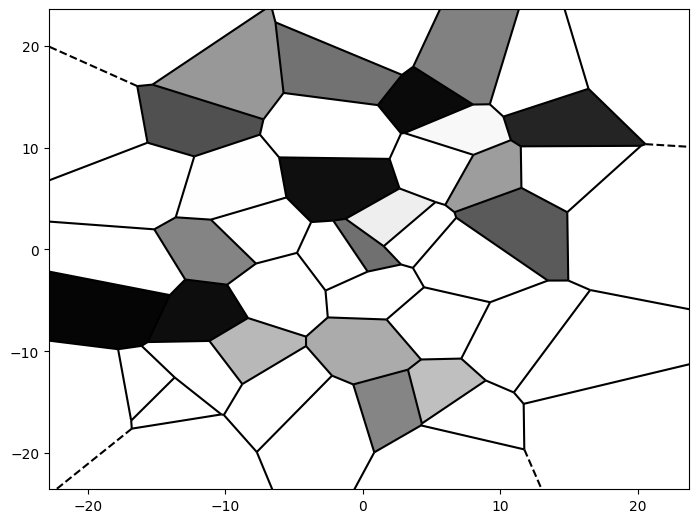

In [7]:
# set some base parameters
v_min = -20
v_max = 20

# create the random diagram
points = np.random.uniform(v_min, v_max, (50, 2))
vor = Voronoi(points)

# plot the figure
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

valid_regions = [ r for r in vor.regions if -1 not in r and len(r) > 0 ]
cmap = get_cmap('Greys')
picked_regions = random.sample(valid_regions, int(len(valid_regions) * 0.5))
for reg in picked_regions:
    reg_vertices = [ vor.vertices[i] for i in reg ]
    ax.add_patch(Polygon(reg_vertices, closed=True, fill=True, fc=cmap(random.random())))
voronoi_plot_2d(vor, ax, show_points=False, show_vertices=False, line_width=1.5)

# either show the figure directly or save it to the given path
if True:
    plt.show()
else:
    plt.savefig(args.output)